#### Meera Duggal, Assignment 4 Initial Project Analysis

1. A brief summary of the topic (a few sentences) 

    Rhiann and I have decided, for our project, to look at education data from the urban institute. This data gives nationwide school locations, enrollment numbers by grade and school district, poverty levels, and many other statistics. All of this knowledge comes from a multitidue of different data sets. Thus, we will have to join atleast 2 or 3 datasets to do the analysis that we would like to do. We will analyse different relationships between different factors that schools have and could try to conclude what factors are most influential on differnt highschool statistics for example, graduation rate or AP scores. There are many different relationships we could analyse especially with the given data sets that we found. 


2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).



    The data below that we have read in is the common core data. This is US Department of Eucation's primary database on public and elemntary secondary education. It gives directory and enrollment information at the school level and directory, enrollment, and finance data at the school district level. 

    Currently we have only read in the year 2008. But, they have many datasets for previous datsets so after our intial anlysis this will deifnitely become more useful later on. 



In [1]:
import pandas as pd
import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs
import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()

endpoint_url = "https://educationdata.urban.org/api/v1/school-districts/ccd/directory/2008/"
response = requests.get(endpoint_url)
results = response.text
data = json.loads(results)

#print(type(data))
#print(pp.pprint(data))

col_names = data['results'][0].keys()

# We wanted to see what different columns they had in the data 
print(col_names)
print(type(col_names))

#converting the api to a dataframe 
common_core = pd.DataFrame(data['results'])

#Get a peek at the data set 
common_core


dict_keys(['year', 'leaid', 'lea_name', 'fips', 'state_leaid', 'street_mailing', 'city_mailing', 'state_mailing', 'zip_mailing', 'zip4_mailing', 'street_location', 'city_location', 'state_location', 'zip_location', 'zip4_location', 'phone', 'latitude', 'longitude', 'urban_centric_locale', 'cbsa', 'cbsa_type', 'csa', 'cmsa', 'necta', 'county_code', 'county_name', 'congress_district_id', 'bureau_indian_education', 'supervisory_union_number', 'agency_type', 'agency_level', 'boundary_change_indicator', 'agency_charter_indicator', 'lowest_grade_offered', 'highest_grade_offered', 'number_of_schools', 'enrollment', 'spec_ed_students', 'english_language_learners', 'migrant_students', 'teachers_prek_fte', 'teachers_kindergarten_fte', 'teachers_elementary_fte', 'teachers_secondary_fte', 'teachers_ungraded_fte', 'teachers_total_fte', 'instructional_aides_fte', 'coordinators_fte', 'guidance_counselors_elem_fte', 'guidance_counselors_sec_fte', 'guidance_counselors_other_fte', 'guidance_counselors_t

,year,leaid,lea_name,fips,state_leaid,street_mailing,city_mailing,state_mailing,zip_mailing,zip4_mailing,...,support_staff_other_fte,staff_total_fte,lea_staff_total_fte,other_staff_fte,school_staff_total_fte,school_counselors_fte,state_leg_district_lower,state_leg_district_upper,school_psychologists_fte,support_staff_stu_wo_psych_fte
0,2008,0100002,ALABAMA YOUTH SERVICES,1,210,P O BOX 66,MT MEIGS,AL,36057,0066,...,0,None,None,None,None,None,,,None,None
1,2008,0100005,ALBERTVILLE CITY,1,101,107 WEST MAIN ST,ALBERTVILLE,AL,35950,0025,...,122,None,None,None,None,None,,,None,None
2,2008,0100006,MARSHALL COUNTY,1,048,12380 US HIGHWAY 431 S,GUNTERSVILLE,AL,35976,9351,...,192,None,None,None,None,None,,,None,None
3,2008,0100007,HOOVER CITY,1,158,2810 METROPOLITAN WAY,HOOVER,AL,35243,5500,...,526,None,None,None,None,None,,,None,None
4,2008,0100008,MADISON CITY,1,169,211 CELTIC DRIVE,MADISON,AL,35758,1615,...,242,None,None,None,None,None,,,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,1300540,BROOKS COUNTY,13,614,704 N. TALLOKAS ROAD,QUITMAN,GA,31643,1643,...,97,None,None,None,None,None,,,None,None
2996,2008,1300570,BRYAN COUNTY,13,615,66 INDUSTRIAL BLVD.,PEMBROKE,GA,31321,1321,...,188,None,None,None,None,None,,,None,None
2997,2008,1300600,BUFORD CITY,13,764,70 WILEY DRIVE,BUFORD,GA,30518,0518,...,81,None,None,None,None,None,,,None,None
2998,2008,1300630,BULLOCH COUNTY,13,616,150 WILLIAMS RD.,STATESBORO,GA,30458,0458,...,371,None,None,None,None,None,,,None,None


Below we will read in the data for Small Area Income and Poverty Estimates. The data is for poverty and such thingies.

In [20]:
endpoint_url = "https://educationdata.urban.org/api/v1/school-districts/saipe/2008/"
response = requests.get(endpoint_url)
results = response.text
data = json.loads(results)

#print(type(data))
#print(pp.pprint(data))

col_names = data['results'][0].keys()

# We wanted to see what different columns they had in the data 
print(col_names)
print(type(col_names))

#converting the api to a dataframe 
poverty_levels = pd.DataFrame(data['results'])

#Get a peek at the data set 
poverty_levels.head()

dict_keys(['district_id', 'district_name', 'est_population_total', 'est_population_5_17', 'est_population_5_17_poverty', 'year', 'leaid', 'fips', 'est_population_5_17_poverty_pct', 'est_population_5_17_pct'])
<class 'dict_keys'>


,district_id,district_name,est_population_total,est_population_5_17,est_population_5_17_poverty,year,leaid,fips,est_population_5_17_poverty_pct,est_population_5_17_pct
0,00005,ALBERTVILLE CITY SCHOOL DISTRICT,18725.0,3310.0,890.0,2008,0100005,1,0.268882,0.176769
1,00030,ALEXANDER CITY CITY SCHOOL DISTRICT,17304.0,2768.0,626.0,2008,0100030,1,0.226156,0.159963
2,00060,ANDALUSIA CITY SCHOOL DISTRICT,8694.0,1341.0,392.0,2008,0100060,1,0.292319,0.154244
3,00090,ANNISTON CITY SCHOOL DISTRICT,24771.0,3982.0,1143.0,2008,0100090,1,0.287042,0.160752
4,00100,ARAB CITY SCHOOL DISTRICT,8880.0,1554.0,266.0,2008,0100100,1,0.171171,0.175000


3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.




In [21]:
#Look for null values 
import numpy as np


common_core.isnull().sum()
poverty_levels.isnull().sum()

#there are very few null values ... seems to be okay if we merge files like this for our 
#analysis 

#remove empty columns from common_core 
common_core = common_core.dropna(thresh=len(common_core), axis=1)
poverty_levels = poverty_levels.dropna(thresh=len(poverty_levels), axis=1 )

print(common_core.shape)
print(poverty_levels.shape)


(3000, 56)
(3000, 9)


The number of null values is small (only 2) in the other data frame and only for one column so we won't remove these. 

In [22]:
# Now we are going to merge the two data sets together 

together_df = common_core.merge(poverty_levels, on =["leaid"], how = "left")
print(together_df.shape)
together_df.head()
together_df.isnull().sum()
nice = together_df.dropna(thresh=400, axis=1 )
list(together_df.columns)


(3000, 64)


['year_x',
 'leaid',
 'lea_name',
 'fips_x',
 'state_leaid',
 'street_mailing',
 'city_mailing',
 'state_mailing',
 'zip_mailing',
 'zip4_mailing',
 'street_location',
 'city_location',
 'state_location',
 'zip_location',
 'zip4_location',
 'phone',
 'latitude',
 'longitude',
 'urban_centric_locale',
 'cbsa',
 'cbsa_type',
 'csa',
 'county_code',
 'county_name',
 'congress_district_id',
 'supervisory_union_number',
 'agency_type',
 'boundary_change_indicator',
 'lowest_grade_offered',
 'highest_grade_offered',
 'number_of_schools',
 'enrollment',
 'spec_ed_students',
 'english_language_learners',
 'teachers_prek_fte',
 'teachers_kindergarten_fte',
 'teachers_elementary_fte',
 'teachers_secondary_fte',
 'teachers_ungraded_fte',
 'teachers_total_fte',
 'instructional_aides_fte',
 'coordinators_fte',
 'guidance_counselors_elem_fte',
 'guidance_counselors_sec_fte',
 'guidance_counselors_other_fte',
 'guidance_counselors_total_fte',
 'librarian_specialists_fte',
 'librarian_support_staff_ft

Seems like it oddly deleted the population poverty percentage for individuals ranging from ages 5-17. Thus we will create the column once again. 

In [31]:
together_df['est_population_5_17_poverty_pct'] = together_df.est_population_5_17_poverty / together_df.est_population_total

together_df.iloc[1:, :]

,year_x,leaid,lea_name,fips_x,state_leaid,street_mailing,city_mailing,state_mailing,zip_mailing,zip4_mailing,...,state_leg_district_upper,district_id,district_name,est_population_total,est_population_5_17,est_population_5_17_poverty,year_y,fips_y,est_population_5_17_pct,est_population_5_17_poverty_pct
1,2008,0100005,ALBERTVILLE CITY,1,101,107 WEST MAIN ST,ALBERTVILLE,AL,35950,0025,...,,00005,ALBERTVILLE CITY SCHOOL DISTRICT,18725.0,3310.0,890.0,2008.0,1,0.176769,0.047530
2,2008,0100006,MARSHALL COUNTY,1,048,12380 US HIGHWAY 431 S,GUNTERSVILLE,AL,35976,9351,...,,00006,MARSHALL COUNTY SCHOOL DISTRICT,46253.0,8342.0,1996.0,2008.0,1,0.180356,0.043154
3,2008,0100007,HOOVER CITY,1,158,2810 METROPOLITAN WAY,HOOVER,AL,35243,5500,...,,00007,HOOVER CITY SCHOOL DISTRICT,67958.0,11905.0,709.0,2008.0,1,0.175182,0.010433
4,2008,0100008,MADISON CITY,1,169,211 CELTIC DRIVE,MADISON,AL,35758,1615,...,,00008,MADISON CITY SCHOOL DISTRICT,33612.0,7168.0,419.0,2008.0,1,0.213257,0.012466
5,2008,0100009,AL INST DEAF AND BLIND,1,600,P O DRAWER 698,TALLADEGA,AL,35161,0698,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,1300540,BROOKS COUNTY,13,614,704 N. TALLOKAS ROAD,QUITMAN,GA,31643,1643,...,,00540,BROOKS COUNTY SCHOOL DISTRICT,16425.0,2914.0,900.0,2008.0,13,0.177412,0.054795
2996,2008,1300570,BRYAN COUNTY,13,615,66 INDUSTRIAL BLVD.,PEMBROKE,GA,31321,1321,...,,00570,BRYAN COUNTY SCHOOL DISTRICT,31173.0,6376.0,846.0,2008.0,13,0.204536,0.027139
2997,2008,1300600,BUFORD CITY,13,764,70 WILEY DRIVE,BUFORD,GA,30518,0518,...,,00600,BUFORD CITY SCHOOL DISTRICT,14668.0,2803.0,417.0,2008.0,13,0.191096,0.028429
2998,2008,1300630,BULLOCH COUNTY,13,616,150 WILLIAMS RD.,STATESBORO,GA,30458,0458,...,,00630,BULLOCH COUNTY SCHOOL DISTRICT,67761.0,10293.0,2224.0,2008.0,13,0.151902,0.032821


4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.

    We will group by the highest grade offered across all districts to see if the average poverty percentage values now tell us anything. 

In [32]:
grouping = together_df[['highest_grade_offered', 
             'est_population_5_17_poverty_pct']].groupby('highest_grade_offered')

interesting = grouping.mean()
another_one = grouping.median()
print(interesting[7:15])
print(another_one[7:15])

                       est_population_5_17_poverty_pct
highest_grade_offered                                 
5                                             0.016181
6                                             0.011962
7                                             0.031676
8                                             0.025750
9                                             0.016665
10                                                 NaN
11                                                 NaN
12                                            0.029979
                       est_population_5_17_poverty_pct
highest_grade_offered                                 
5                                             0.012248
6                                             0.009453
7                                             0.031676
8                                             0.020614
9                                             0.016665
10                                                 NaN
11        

What we did above essentially groups by the highest grade offered and then calculated both the mean and median percents for that grade. Doesn't seem like too much difference across places that offer a higher grade and their poverty levels. Looks like for grade 7 the median and the mean are the highest but we will definitely have to look into this further. For exmaple, by subsetting by different state as well. 

Now we will try to group by the degree of urbanization and compute different summary statistics for these areas then.

In [33]:
grouping = together_df[['urban_centric_locale', 
             'est_population_5_17_poverty_pct']].groupby('urban_centric_locale')

interesting = grouping.mean()
another_one = grouping.median()
print(interesting)
print(another_one)

                      est_population_5_17_poverty_pct
urban_centric_locale                                 
11                                           0.028625
12                                           0.022501
13                                           0.023698
21                                           0.018047
22                                           0.019752
23                                           0.026147
31                                           0.027698
32                                           0.035301
33                                           0.033323
41                                           0.025788
42                                           0.031008
43                                           0.036684
                      est_population_5_17_poverty_pct
urban_centric_locale                                 
11                                           0.025345
12                                           0.018705
13                          

Doesn't seem like there is too much variation amongst different urbanized areas and such. The one with the highest median and mean is 32 which codes a distant town. I think sense this data is across the whole of the Unites States it will be more beneifical to look at specific pockets / states and analyze trends that are there instead. 

<AxesSubplot:title={'center':'Highest grade offered vs. the number of school elligeble students in poverty for counties in Arizona'}, xlabel='highest_grade_offered'>

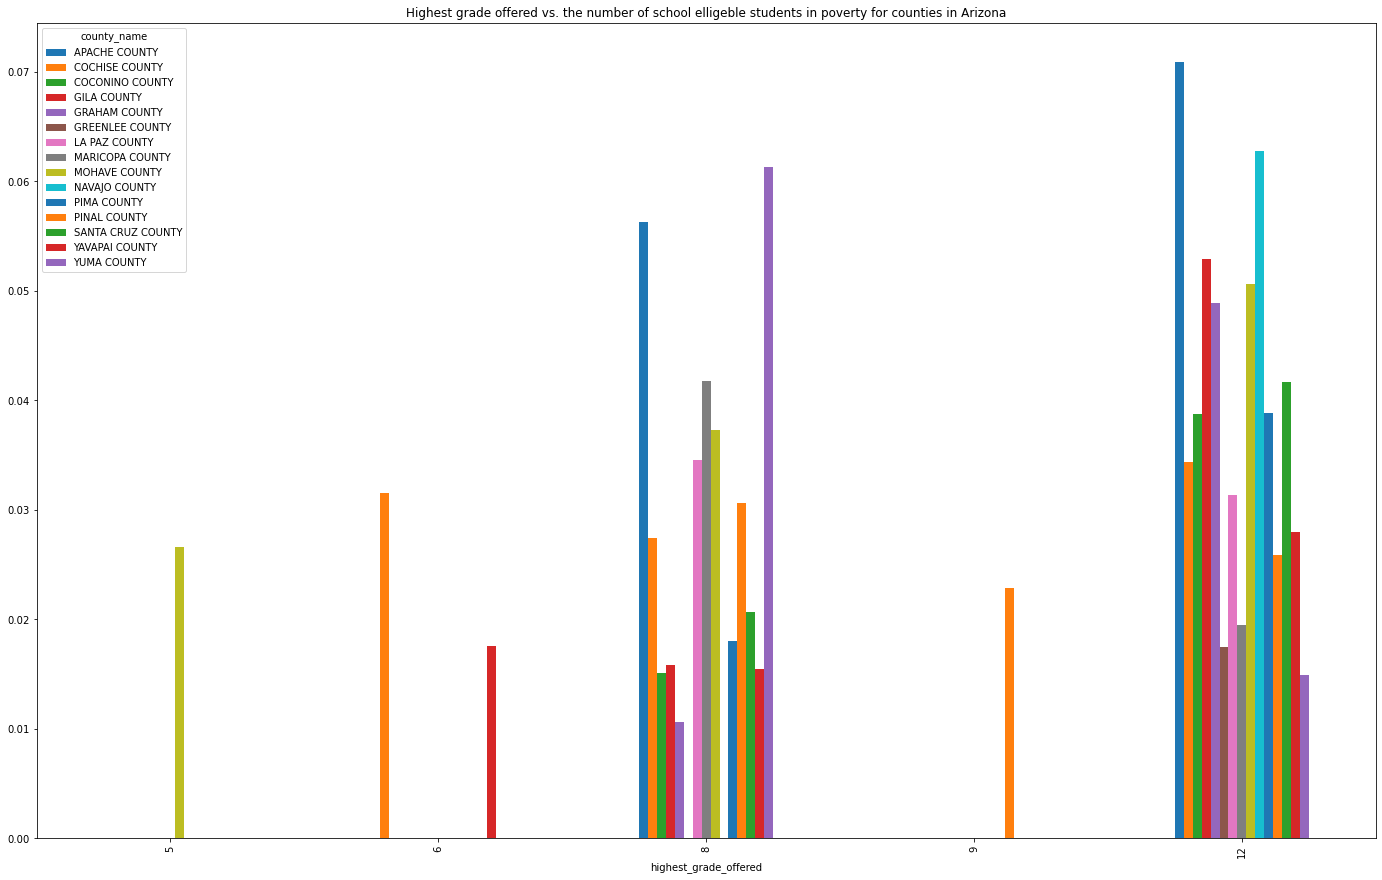

In [51]:
#Going to pick only one State to look at 
#For this analysis we will look at Arizona
#subsetting the dataframe for Arizona 

arizona_data = together_df[together_df.state_location == 'AZ']
arizona_data = arizona_data[arizona_data.highest_grade_offered != -2]

pd.pivot_table(arizona_data, values='est_population_5_17_poverty_pct', index=['highest_grade_offered'], columns=['county_name']).plot(
    kind='bar', figsize=(24,15), title='Highest grade offered vs. the number of school elligeble students in poverty for counties in Arizona')

This graph is essentially just showing us for each county the highest grade that is offered there and also then what the poverty is for ages 5-17 by percent and doing that relationship. 

5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.

6. Include a short written analysis of your interpretation of the data.

Text(0, 0.5, 'Poverty Rate for Kids Ages 5-17 in Specific Counties')

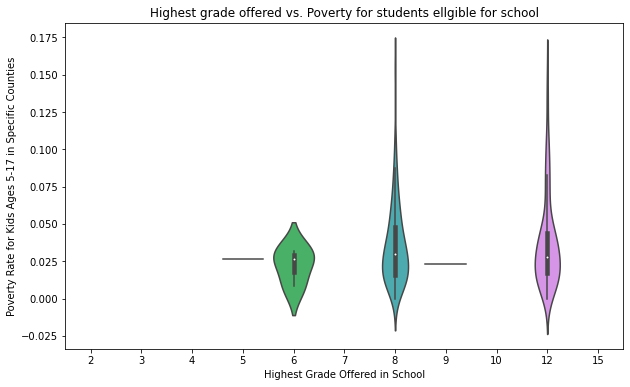

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns

#We will continue to only look at the Data for Arizona 
#Seems good to focus on only one State 

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=arizona_data, x='highest_grade_offered', y='est_population_5_17_poverty_pct',ax=ax)
ax.set_title('Highest grade offered vs. Poverty for students ellgible for school')
ax.set_xlabel('Highest Grade Offered in School')
ax.set_ylabel('Poverty Rate for Kids Ages 5-17 in Specific Counties')

It appears that there are lots of outliers especially for the 8th grade and the 12th grade schools. I think this makes sense as the outliers are telling us that there may not be a relationship between poverty rates and the highest grade offered in schools. This is probably because a majority of schools offered in the United States either go to 6th grade, 8th grade, or 12th grade. 
 
I think there are different factors that may change as we look at schools with lower poverty rates. Thus, for our next plot we will look at poverty rates on the x axis and compare it to the number of full time teachers at those schools. 


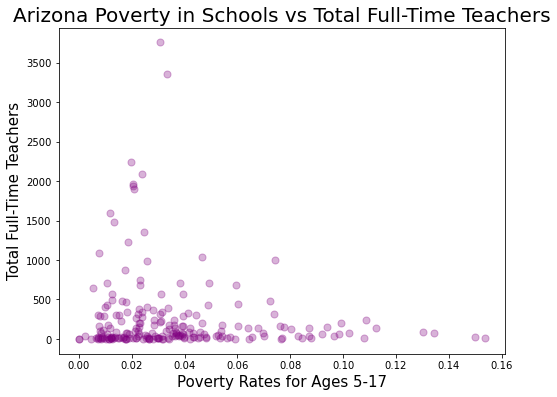

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Arizona Poverty in Schools vs Total Full-Time Teachers", fontsize=20)
ax.set_xlabel('Poverty Rates for Ages 5-17', fontsize=15)
ax.set_ylabel('Total Full-Time Teachers', fontsize=15)
foo = ax.scatter(
    arizona_data['est_population_5_17_poverty_pct'], arizona_data['teachers_total_fte'], alpha=.3, s=50, color = 'purple')

From this plot we can see that counties that have a higher poverty rate from Ages 5-17 also tend to have less full-time teachers at these schools. Once we introduce the dataset with bullying / AP scores it will be insightful then to further this analysis to see what more relationships we can explore. 

7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform. 

    We intend to answer the question: How does socioeconmic status affect different factors involved with schooling across different grades at a district level? 
    
    We may have to change this question because there is a lot more data that we have the ability to work with, so using socioeconmic status as the main factor we want to compare reltionships too might not be the most insightful. The website that hosts all of the api's for the data is: https://educationdata.urban.org/documentation/school-districts.html#ccd_directory . For the above analysis I pulled the data for common core and the data for poverty as well. 
    
    In order to analyze this question we will map the relationship between poverty and different factors in specific school districts such as if they have high number of schools and if they have many teachers / not. This will give insight on how poverty affects schools. Also, we will introduce a new data set that has different factors such as bullying levels, AP scores, and graduation rates. Also, in the current data set that I read in there is a column for english learners and for migrant speakers and once we bucket these it will be interesting to look at the relationships with these given columns as well. It will also be intersting to anlayze these relationship on a visual level. Since we are given all of this data (by district with longitude and latitude) on a yearly level we could make some very cool changing geo visuals. 
    
    If we want to proceed to do some modeling after our inital analysis I think we may have to change our question, but things always change after EDA as it will give us more insight into the problem and the different relationships that we can explore. 